In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv') #loading the file

In [23]:
df.head() #reading heads

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [25]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [26]:
df.isnull().sum() #checking the number of null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [27]:
df['Reviews'].unique() #tsking the note of the values in 'rewiews' column

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [32]:
df['Reviews']=df['Reviews'].astype('int') #doing type casting

In [29]:
df['Reviews'].str.isnumeric().sum() #unable to do the type casting as one of the column in reviews having string data type and we are calculating the number of values which are numeric

10840

In [30]:
df[~df['Reviews'].str.isnumeric()] #getting the non-numeric row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [31]:
df['Reviews']=df['Reviews'].str.replace('3.0M','3000000') #replacing the value

<ipython-input-31-d9a2087d6916>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews']=df['Reviews'].str.replace('3.0M','3000000') #replacing the value


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [ ]:
df['Reviews']=df['Reviews'].astype('int')

In [34]:
df.drop(index=10472,inplace=True)

In [35]:
df['Size'].unique() #looking into the values of size column

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [36]:
def convert_size(size): # as size has been given into Mb and Kb, so we would like to have whole data into kb and replace it by empty space
    if 'M' in size:
      return int(float(size.replace('M',''))*1000)
    elif 'k' in size:
      return float(size.replace('k',''))
    elif 'Varies with device' in size:
      return np.nan
    else:
      return np.nan


In [37]:
df['Size']=df['Size'].apply(convert_size)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [39]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [40]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [41]:
cols=['Installs','Price'] #replacing unnecessary charcters to make data more clear
chars_to_remove=['+', ',' ,'$']
for i in cols:
  for j in chars_to_remove:
    df[i]=df[i].str.replace(j,'')
#or df['installs]=df['installs].str.replace(',','')

<ipython-input-41-476ab5c500d3>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[i]=df[i].str.replace(j,'')


In [42]:
df['Installs']=df['Installs'].astype('int') #changing the type
df['Price']=df['Price'].astype('float')

In [43]:
df['Last Updated']=pd.to_datetime(df['Last Updated']) #changing it into date time format
df['day']=df['Last Updated'].dt.day
df['month']=df['Last Updated'].dt.month
df['year']=df['Last Updated'].dt.year

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  day             10840 non-null  int64         
 14  month           10840 non-null  int64         
 15  ye

In [45]:
#remove duplicates from my column 'app'
df.drop_duplicates(subset=['App'],keep='first',inplace=True)

In [46]:
df['App'].duplicated().sum()

0

In [47]:
df.ndim #getting the dimensions

2

In [48]:
df.shape #finding number of rows and columns

(9659, 16)

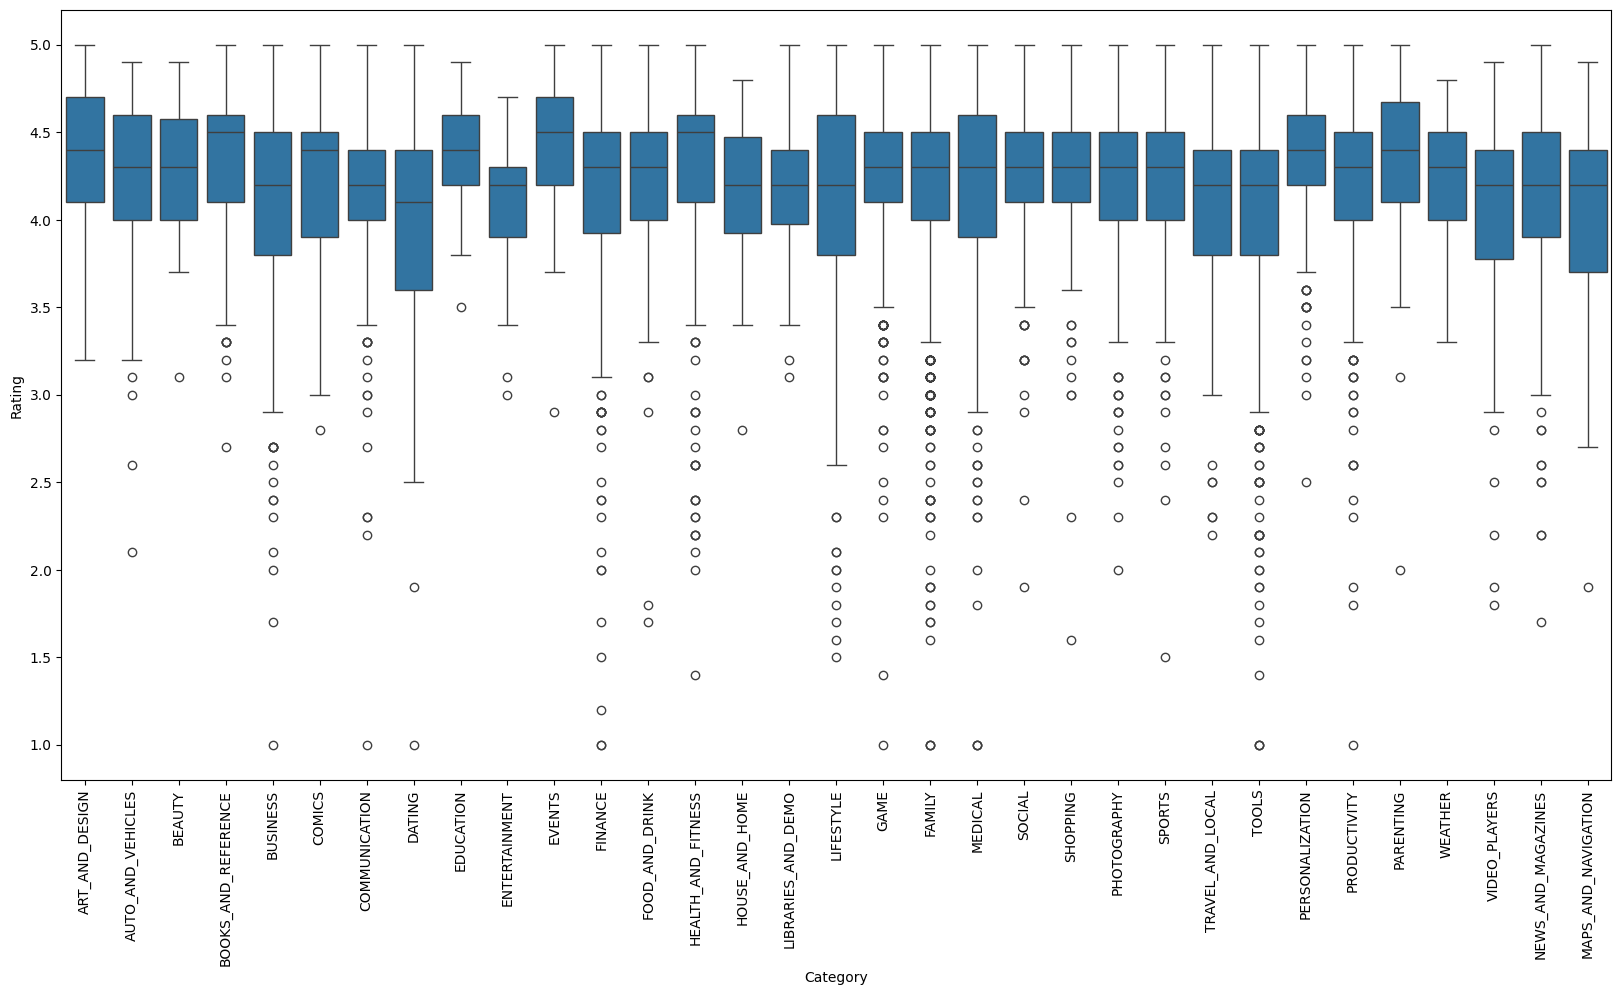

In [49]:
#Rating of apps varying by category
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Category'],y=df['Rating'])
plt.xticks(rotation=90)
plt.show()

In [50]:
df.isnull().sum()
'''I can't drop the rows which have the missing values in rating and size as by deleting them it can show bianess.
Missing values can affect the performance of macgine learning models and it's very important to handle them properly.
'''

"I can't drop the rows which have the missing values in rating and size as by deleting them it can show bianess.\nMissing values can affect the performance of macgine learning models and it's very important to handle them properly.\n"

In [51]:
# Mean imputation for 'Rating' column
rating_mean = df['Rating'].mean()
df['Rating'].fillna(rating_mean, inplace=True)

# Mode imputation for 'Size' column
size_mode = df['Size'].mode()[0]  # Using mode()[0] to handle multiple modes
df['Size'].fillna(size_mode, inplace=True)

In [52]:
df=df.dropna().reset_index(drop=True) #resetting the index

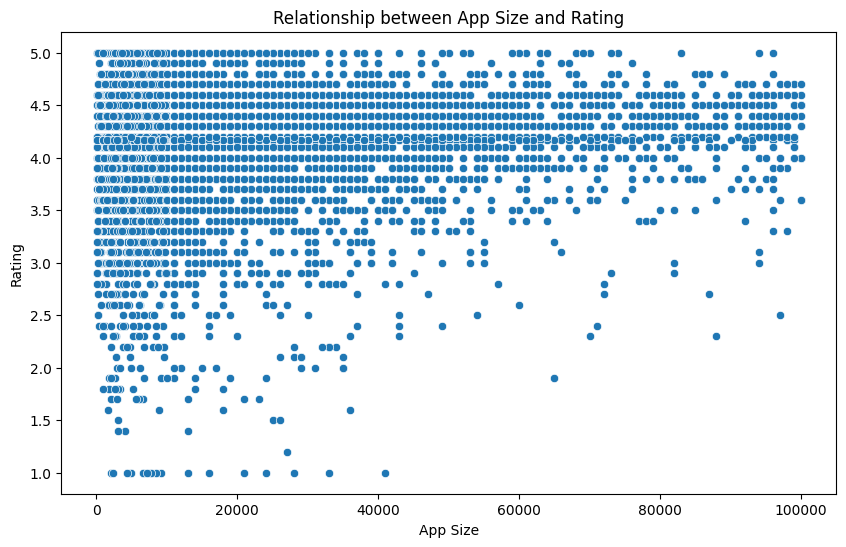

In [53]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=df)
plt.title('Relationship between App Size and Rating')
plt.xlabel('App Size')
plt.ylabel('Rating')
plt.show()

<ipython-input-54-f7e86bc9dc44>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Type', y='Price', data=df,ci=None)


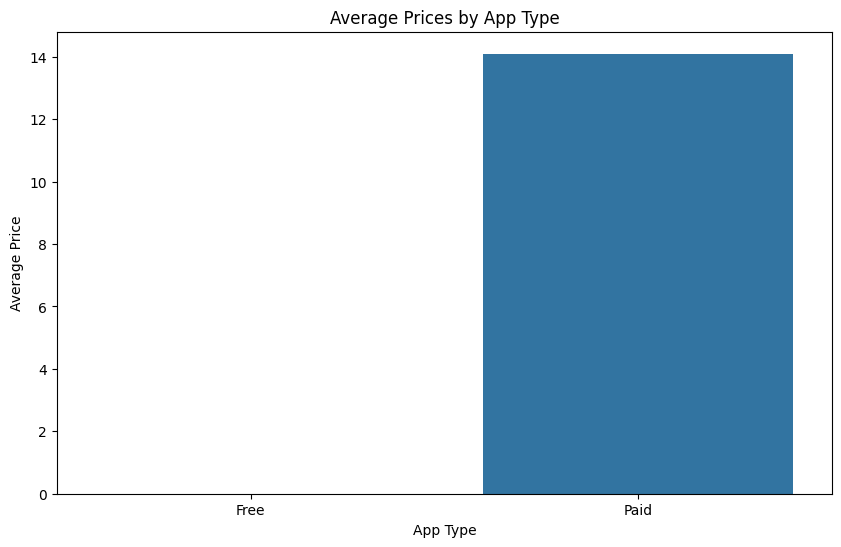

In [54]:
#plotting bar chart for prices by app type
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Price', data=df,ci=None)
plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.show()

In [55]:
# Grouping the data by 'App' and calculating the total number of installs for each app
app_installs = df.groupby('App')['Installs'].sum()

# Sorting the apps by the number of installs in descending order and selecting the top 10
top_10_apps = app_installs.sort_values(ascending=False).head(10)

# Displaying the top 10 most popular apps
print("Top 10 Most Popular Apps:")
print(top_10_apps)

Top 10 Most Popular Apps:
App
Google                                      1000000000
Google Play Movies & TV                     1000000000
Gmail                                       1000000000
Instagram                                   1000000000
Google Chrome: Fast & Secure                1000000000
Google Drive                                1000000000
Google News                                 1000000000
Messenger – Text and Video Chat for Free    1000000000
Google Photos                               1000000000
Skype - free IM & video calls               1000000000
Name: Installs, dtype: int64


In [56]:
#plotting a bar plot to get a pov for identifying the most popular app category by taking rating,reviews,size,type and number of installs in our terms to understand the characteristics of popular apps within each category.



In [ ]:
'''To identify the most successful app developers we can look into rating, reviews and number of installs.
We can use barplot and pie chart.
'''

In [ ]:
'''To analyze best time to launch anew app, we can consider number of app installs over the time to know the utilization of the user acitivity on Google Playstore. For this we can look for line chart.
Same goes to the app ratings over the time.
We can consider number of application updates over the time and can use bar chart.
'''